In [51]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
raw_df = mk.get_daily_price('삼성전자', '2018-05-04', '2020-01-22')

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0~1 값으로 변환"""
    numerator = data - np.min(data,  0)
    denominator = np.max(data, 0) - np.min(data,  0)
    return numerator / (denominator + 1e-7)

dfx = raw_df[['open', 'high', 'low', 'volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]

x = dfx.values.tolist()
y = dfy.values.tolist()

In [52]:
raw_df

,code,date,open,high,low,close,diff,volume
date,,,,,,,,
2018-05-04,005930,2018-05-04,53000,53900,51800,51900,1100,39565391
2018-05-08,005930,2018-05-08,52600,53200,51900,52600,700,23104720
2018-05-09,005930,2018-05-09,52600,52800,50900,50900,1700,16128305
2018-05-10,005930,2018-05-10,51700,51700,50600,51600,700,13905263
2018-05-11,005930,2018-05-11,52000,52200,51200,51300,300,10314997
...,...,...,...,...,...,...,...,...
2020-01-16,005930,2020-01-16,59100,60700,59000,60700,1700,14381774
2020-01-17,005930,2020-01-17,61900,62000,61000,61300,600,16025661
2020-01-20,005930,2020-01-20,62000,62800,61700,62400,1100,12528855


In [53]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 2018-05-04 to 2020-01-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    421 non-null    float64
 1   high    421 non-null    float64
 2   low     421 non-null    float64
 3   volume  421 non-null    float64
 4   close   421 non-null    float64
dtypes: float64(5)
memory usage: 19.7+ KB


In [54]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 2018-05-04 to 2020-01-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    421 non-null    float64
 1   high    421 non-null    float64
 2   low     421 non-null    float64
 3   volume  421 non-null    float64
 4   close   421 non-null    float64
dtypes: float64(5)
memory usage: 19.7+ KB


In [55]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 2018-05-04 to 2020-01-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   421 non-null    float64
dtypes: float64(1)
memory usage: 6.6+ KB


In [56]:
x[-6:]

[[0.898167006106321,
  0.8730158730124087,
  0.8873239436584011,
  0.1674615836301646,
  0.8637274549063578],
 [0.8818737270839841,
  0.9166666666630291,
  0.8913480885276002,
  0.16882989330989187,
  0.9318637274511749],
 [0.9959266802403425,
  0.968253968250126,
  0.9718309859115821,
  0.19665250042066781,
  0.9559118236434633],
 [0.9999999999959267,
  0.9999999999960317,
  0.9999999999959758,
  0.13746944253371812,
  0.999999999995992],
 [0.9999999999959267,
  0.9841269841230789,
  0.9798792756499803,
  0.11400880277083453,
  0.9599198396755113],
 [0.9389002036621633,
  0.9920634920595552,
  0.9476861166963876,
  0.18504040089784482,
  0.9959919839639438]]

In [57]:
y[-6:]

[[0.8637274549063578],
 [0.9318637274511749],
 [0.9559118236434633],
 [0.999999999995992],
 [0.9599198396755113],
 [0.9959919839639438]]

In [58]:
data_x = []
data_y = []
window_size = 10
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음날 종가(i + window_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

[[0.7637474541720417, 0.7857142857111677, 0.7665995975824281, 0.323174686971615, 0.7755511022013004], [0.8533604887948947, 0.8333333333300265, 0.8269617706204146, 0.33335345138624783, 0.8476953907781655], [0.8696537678172315, 0.8769841269806469, 0.8631790744432065, 0.19622106804249292, 0.8837675350665981], [0.9022403258619053, 0.8888888888853615, 0.8953722333967993, 0.117672127572782, 0.9038076152268384], [0.9348268839065791, 0.9285714285677438, 0.927565392350392, 0.21155713424914332, 0.9038076152268384], [0.898167006106321, 0.8730158730124087, 0.8873239436584011, 0.1674615836301646, 0.8637274549063578], [0.8818737270839841, 0.9166666666630291, 0.8913480885276002, 0.16882989330989187, 0.9318637274511749], [0.9959266802403425, 0.968253968250126, 0.9718309859115821, 0.19665250042066781, 0.9559118236434633], [0.9999999999959267, 0.9999999999960317, 0.9999999999959758, 0.13746944253371812, 0.999999999995992], [0.9999999999959267, 0.9841269841230789, 0.9798792756499803, 0.11400880277083453,

In [59]:
# 훈련용 데이터셋
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0:train_size])
train_y = np.array(data_y[0:train_size])

# 테스트용 데이터셋
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size:len(data_x)])
test_y = np.array(data_y[train_size:len(data_y)])


In [61]:
model = Sequential()
model.add(LSTM(units=10, activation="relu", return_sequences=True, input_shape=(window_size, 5)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 10, 10)            640       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10, 10)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
10/10 [==============================] - 0s 7ms/step - loss: 0.1015
Epoch 2/60
10/10 [=====================

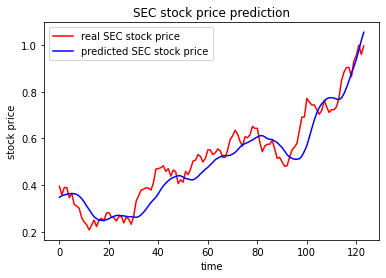

In [62]:
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [63]:
# 다음날 예측 종가 출력
print("SEC tommorow`s price :", raw_df.close[-1]*pred_y[-1]/dfy.close[-1])


SEC tommorow`s price : [65970.45]
